<a href="https://colab.research.google.com/github/wallik2/University-stuff/blob/main/Intro_Data_Sci/Homework/HW11_12_Clustering_(Iris).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### 1. Collecting the data

In [ ]:
import pandas as pd, numpy as np ,matplotlib.pyplot as plt, seaborn as sns

iris = pd.read_csv("/content/drive/MyDrive/Data /iris.data",header=None)

iris.columns = ['Petal Length', 'Petal Width', 'Sepal Length', 'Sepal Width', 'Species']

iris

,Petal Length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica




---



##### 2. Data Exploration

In [ ]:
iris.describe()

,Petal Length,Petal Width,Sepal Length,Sepal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


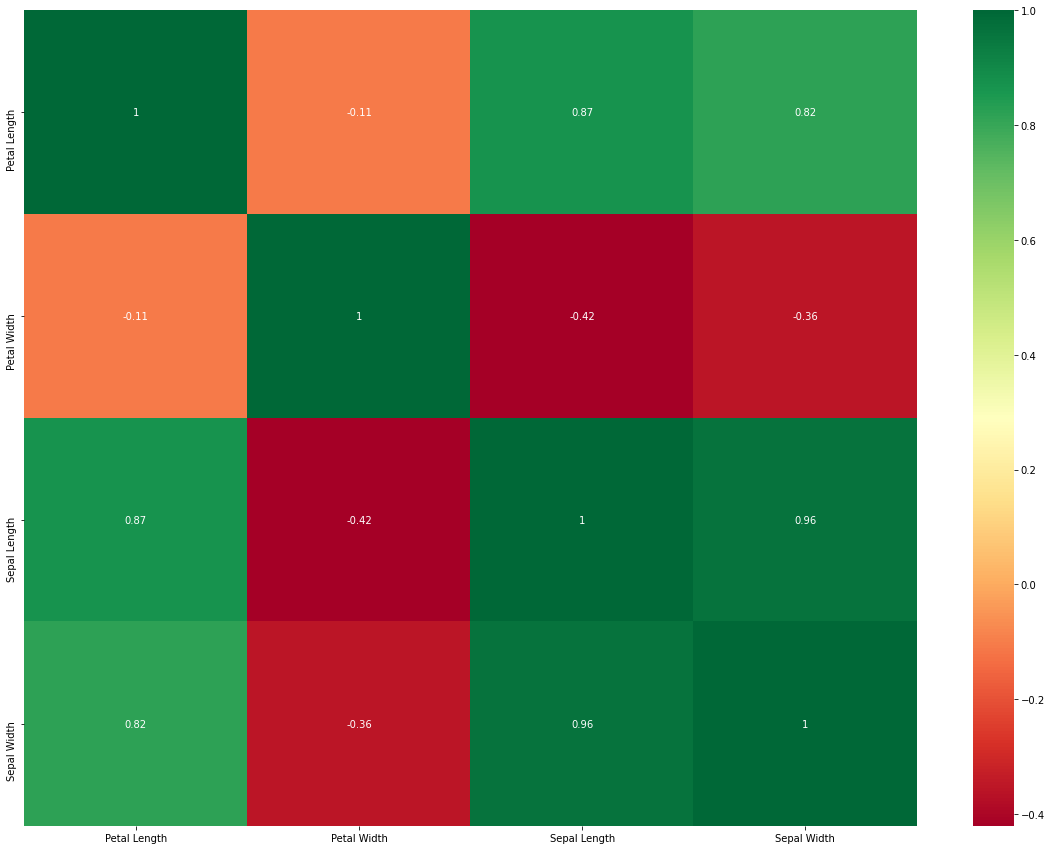

In [ ]:
corr_matrix = iris.corr()
top_corr_features = corr_matrix.index
plt.figure(figsize=(20,15))
#Plot heat map
g=sns.heatmap(iris[top_corr_features].corr(),annot=True,cmap="RdYlGn")

> From Collinearity: Sepal width & Sepal length has the highest multicollinearity

In [ ]:
X = iris.drop('Species',axis=1)

y = iris['Species']

#Extract the features & label 

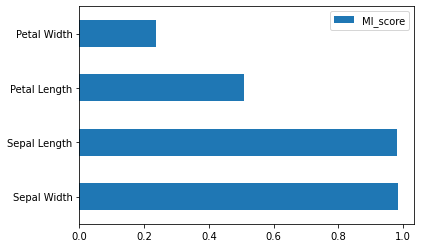

In [ ]:
from sklearn.feature_selection import mutual_info_classif

m1_score = mutual_info_classif(X,y)

m1_score = pd.DataFrame(data=m1_score,columns=['MI_score'],index=X.columns)

m1_score.sort_values(by='MI_score',ascending=False).plot.barh()

> From Mutual Information: Sepal length has the strongest relationship with Species, following by Sepal length

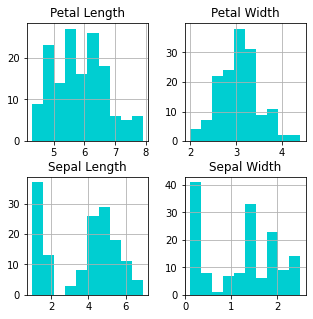

In [ ]:
iris.hist(bins=10, figsize= (5,5), color='darkturquoise')

plt.show()

> Petal length & Petal width have the distribution shape closed to Normal distribution.



---



##### 3. Data Preprocessing

###### A) Check the missing values & outliers

In [ ]:
#Checking missing values

if (len(iris.columns) == iris.isnull().sum(axis=0).value_counts()[0]):
  print('No missing value was found')

No missing value was found


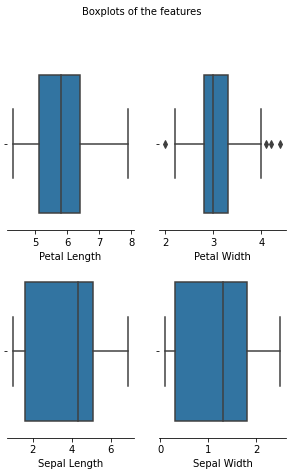

In [ ]:
from scipy import stats

fig, ax = plt.subplots(2,2,figsize=(5,7))

fig.suptitle('Boxplots of the features',fontsize=10)

sns.despine(left=True)

L = 0

for i in range(2):
  for k in range(2):
    sns.boxplot(ax=ax[i][k], x=iris.iloc[:,L])
    L += 1
    if L == 4:
      break
    

> Only Petal width has a bit of outliers, but that's not a problem



---



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [ ]:
X_train.reset_index(drop=True, inplace=True)

In [ ]:
y_train.reset_index(drop=True , inplace=True)

In [ ]:
X_train

,Petal Length,Petal Width,Sepal Length,Sepal Width
0,4.6,3.6,1.0,0.2
1,5.7,4.4,1.5,0.4
2,6.7,3.1,4.4,1.4
3,4.8,3.4,1.6,0.2
4,4.4,3.2,1.3,0.2
...,...,...,...,...
115,6.1,2.8,4.0,1.3
116,4.9,2.5,4.5,1.7
117,5.8,4.0,1.2,0.2
118,5.8,2.6,4.0,1.2


> If don't split? then how can we make sure that the model is ready to deploy?

In [ ]:
data_train = pd.concat([y_train, X_train], axis=1)

data_train

,Species,Petal Length,Petal Width,Sepal Length,Sepal Width
0,Iris-setosa,4.6,3.6,1.0,0.2
1,Iris-setosa,5.7,4.4,1.5,0.4
2,Iris-versicolor,6.7,3.1,4.4,1.4
3,Iris-setosa,4.8,3.4,1.6,0.2
4,Iris-setosa,4.4,3.2,1.3,0.2
...,...,...,...,...,...
115,Iris-versicolor,6.1,2.8,4.0,1.3
116,Iris-virginica,4.9,2.5,4.5,1.7
117,Iris-setosa,5.8,4.0,1.2,0.2
118,Iris-versicolor,5.8,2.6,4.0,1.2




---



<fieldset>

Petal Length & Petal Width

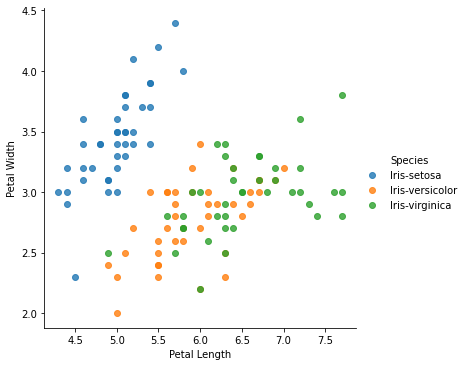

In [ ]:
sns.lmplot(x="Petal Length", y="Petal Width", data=data_train, hue="Species", fit_reg=False, legend=True)

> Are these clusters discriminately obvious?



---



<fieldset>

Sepal Length & Petal Width

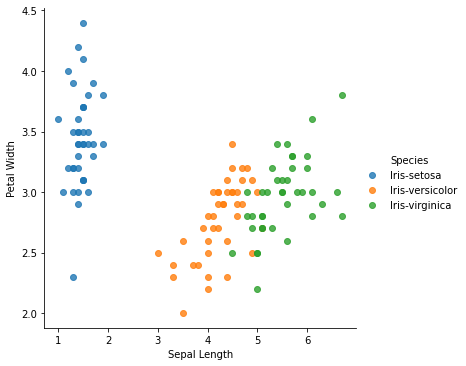

In [ ]:
sns.lmplot(x="Sepal Length", y="Petal Width", data=data_train, hue="Species", fit_reg=False, legend=True)

> The clusters are more obvious than Petal length & Petal width 



---



<fieldset>

Sepal Length & Sepal Width

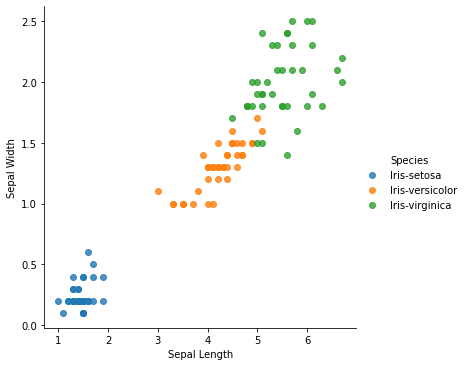

In [ ]:
sns.lmplot(x="Sepal Length", y="Sepal Width", data=data_train, hue="Species", fit_reg=False, legend=True)

> Discrimination is real! ... This is the most obvious clustering ever

> Assumption: Using these 2 features might be enough to classify which species it belong to



---



<fieldset>

Petal Width & Sepal Width

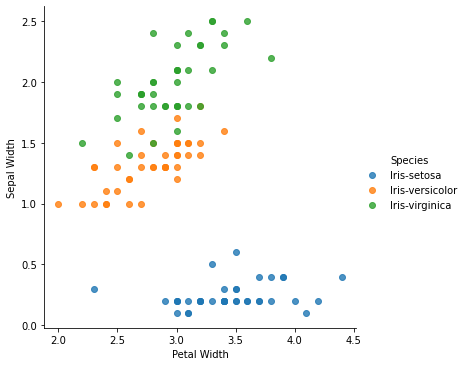

In [ ]:
sns.lmplot(x="Petal Width", y="Sepal Width", data=data_train, hue="Species", fit_reg=False, legend=True)

> Not bad, but Sepal width & Sepal length is far way better



---



###### B) Normalization


- Normalization for its best

In [ ]:
from sklearn.preprocessing import MinMaxScaler

MMS = MinMaxScaler()

MMS.fit(X_train)

X_tr = pd.DataFrame(MMS.transform(X_train))

X_tr.columns = X_train.columns

X_tr

,Petal Length,Petal Width,Sepal Length,Sepal Width
0,0.088235,0.666667,0.000000,0.041667
1,0.411765,1.000000,0.087719,0.125000
2,0.705882,0.458333,0.596491,0.541667
3,0.147059,0.583333,0.105263,0.041667
4,0.029412,0.500000,0.052632,0.041667
...,...,...,...,...
115,0.529412,0.333333,0.526316,0.500000
116,0.176471,0.208333,0.614035,0.666667
117,0.441176,0.833333,0.035088,0.041667
118,0.441176,0.250000,0.526316,0.458333


###### C) Dimensional Reduction

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(X_tr)

X_tr_2 = pd.DataFrame(pca.transform(X_tr))
X_tr_2

,0,1
0,-0.745859,0.089402
1,-0.545741,0.522342
2,0.243203,0.122122
3,-0.641903,0.034153
4,-0.714198,-0.089117
...,...,...
115,0.114077,-0.062010
116,0.136886,-0.344117
117,-0.593411,0.394016
118,0.061437,-0.174443


In [ ]:
data_train_2 =  pd.concat([y_train, X_tr_2], axis=1)

data_train_2

,Species,0,1
0,Iris-setosa,-0.745859,0.089402
1,Iris-setosa,-0.545741,0.522342
2,Iris-versicolor,0.243203,0.122122
3,Iris-setosa,-0.641903,0.034153
4,Iris-setosa,-0.714198,-0.089117
...,...,...,...
115,Iris-versicolor,0.114077,-0.062010
116,Iris-virginica,0.136886,-0.344117
117,Iris-setosa,-0.593411,0.394016
118,Iris-versicolor,0.061437,-0.174443


In [ ]:
data_train_2.columns = ['Species','feature 0', 'feature 1']
data_train_2

,Species,feature 0,feature 1
0,Iris-setosa,-0.745859,0.089402
1,Iris-setosa,-0.545741,0.522342
2,Iris-versicolor,0.243203,0.122122
3,Iris-setosa,-0.641903,0.034153
4,Iris-setosa,-0.714198,-0.089117
...,...,...,...
115,Iris-versicolor,0.114077,-0.062010
116,Iris-virginica,0.136886,-0.344117
117,Iris-setosa,-0.593411,0.394016
118,Iris-versicolor,0.061437,-0.174443


> Are you wondering to see the clusters after PCA?



---



<fieldset>

feature 0 & feature 1

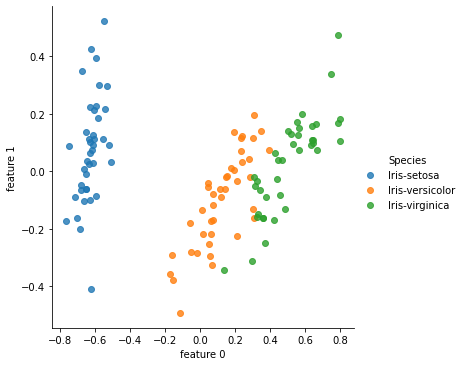

In [ ]:
sns.lmplot(x='feature 0', y='feature 1', data=data_train_2, hue="Species", fit_reg=False, legend=True)

> Is it really help our clustering algorithm do their job easier?



---



###### D) Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [ ]:
X_tr_2

,0,1
0,-0.745859,0.089402
1,-0.545741,0.522342
2,0.243203,0.122122
3,-0.641903,0.034153
4,-0.714198,-0.089117
...,...,...
115,0.114077,-0.062010
116,0.136886,-0.344117
117,-0.593411,0.394016
118,0.061437,-0.174443


In [ ]:
label_encoder.fit(y_train)

y_train = label_encoder.transform(y_train)

In [ ]:
y_train = pd.DataFrame(y_train,columns=['Species'])

In [ ]:
data_train_3 =  pd.concat([y_train, X_tr_2], axis=1)

data_train_3

,Species,0,1
0,0,-0.745859,0.089402
1,0,-0.545741,0.522342
2,1,0.243203,0.122122
3,0,-0.641903,0.034153
4,0,-0.714198,-0.089117
...,...,...,...
115,1,0.114077,-0.062010
116,2,0.136886,-0.344117
117,0,-0.593411,0.394016
118,1,0.061437,-0.174443




---



### 4. Model Training

> All algorithm we are going to use is K-Mean

In [ ]:
# Let k=3, since there're only just 3 species, if not, Is there any species I missed ?

from sklearn.cluster import KMeans

K_mean = KMeans(n_clusters=3,n_init= 100,random_state=0)

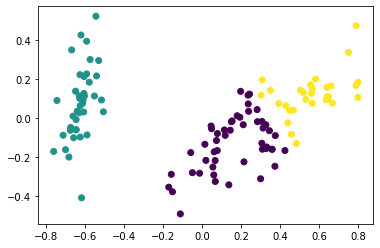

In [ ]:
# Clustering made by the K-mean model

# The predicted group

Model = K_mean.fit(X_tr_2)

#Model.cluster_centers_

group_predict = Model.predict(X_tr_2)

plt.scatter(data_train_2['feature 0'],data_train_2['feature 1'], c=group_predict)

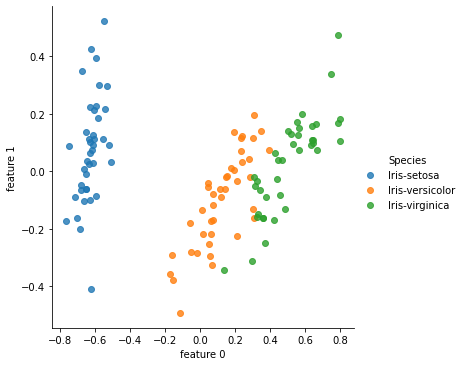

In [ ]:
# The real group

sns.lmplot(x='feature 0', y='feature 1', data=data_train_2, hue="Species", fit_reg=False, legend=True)

In [ ]:
group_predict

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 2, 1, 1, 0, 0, 2, 0, 2, 0, 2,
       0, 1, 2, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0,
       0, 0, 2, 0, 1, 0, 2, 1, 1, 0, 2, 1, 2, 1, 1, 0, 0, 2, 0, 0, 2, 0,
       1, 1, 0, 2, 1, 1, 1, 0, 2, 1, 2, 2, 1, 0, 0, 0, 2, 2, 1, 2, 0, 2,
       0, 0, 0, 1, 0, 0, 1, 0, 2, 2, 1, 0, 2, 2, 1, 2, 1, 2, 2, 2, 0, 2,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 2], dtype=int32)

In [ ]:
Model.labels_

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 2, 1, 1, 0, 0, 2, 0, 2, 0, 2,
       0, 1, 2, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0,
       0, 0, 2, 0, 1, 0, 2, 1, 1, 0, 2, 1, 2, 1, 1, 0, 0, 2, 0, 0, 2, 0,
       1, 1, 0, 2, 1, 1, 1, 0, 2, 1, 2, 2, 1, 0, 0, 0, 2, 2, 1, 2, 0, 2,
       0, 0, 0, 1, 0, 0, 1, 0, 2, 2, 1, 0, 2, 2, 1, 2, 1, 2, 2, 2, 0, 2,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 2], dtype=int32)

> Are they similar ?, yes it did, let see the accuracy the performance of this K-mean

In [ ]:
from sklearn import metrics

score = metrics.adjusted_mutual_info_score(y_train.to_numpy().flatten(), group_predict)

score

0.6950999496675995

> The accuracy is 69.5% according to Mutual information score, which is not bad

> Next, let's predict the test set



---



### 5. Model Deployment

> Preprocess the test set first

In [ ]:
#Normalize first

X_tr_test = pd.DataFrame(MMS.transform(X_test))

In [ ]:
# Then PCA

X_tr_test = pca.transform(X_tr_test)

X_tr_test = pd.DataFrame(X_tr_test); #X_tr_test

In [ ]:
y_test = label_encoder.transform(y_test)

y_test = pd.DataFrame(y_test,columns=['Species']); #y_test

In [ ]:
data_test =  pd.concat([y_test, X_tr_test], axis=1)

data_test.columns = ['Species','feature 0', 'feature 1']
#data_test

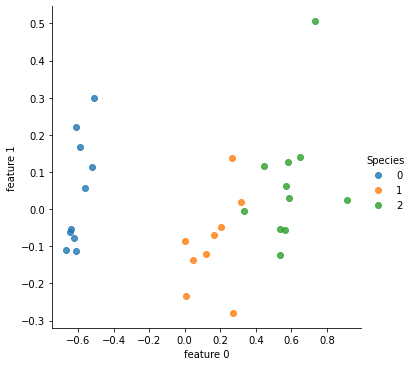

In [ ]:
sns.lmplot(x='feature 0', y='feature 1', data=data_test, hue="Species", fit_reg=False, legend=True)



---



In [ ]:
group_predict_test = Model.predict(X_tr_test)

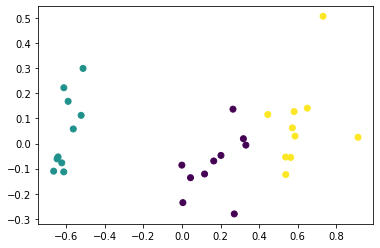

In [ ]:
# The predict one

plt.scatter(data_test['feature 0'],data_test['feature 1'], c=group_predict_test)

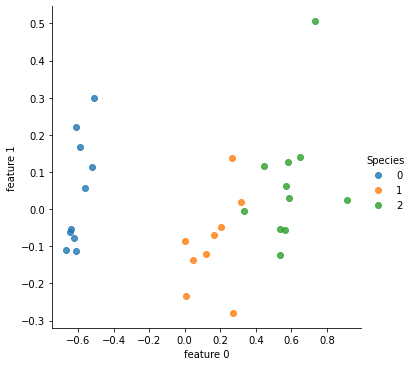

In [ ]:
# The real one

sns.lmplot(x='feature 0', y='feature 1', data=data_test, hue="Species", fit_reg=False, legend=True)

> Great prediction, the predict one & real one are closely similar, let declare this good by evaluating by MI score

In [ ]:
score_test = metrics.adjusted_mutual_info_score(y_test.to_numpy().flatten(), group_predict_test)

score_test

0.8923689116628176

> The score is impressive (Note that the range of MI score is 0 to 1)

> However, the score is high might be the result from very low sample, this is why we need more data!



---

